What You're Aiming For

In this checkpoint, we are going to work on the 'Climate change in Africa' dataset that was provided by the U.S global change research program.


Dataset description : This dataset contains historical data about the daily min, max and average temperature fluctuation in 5 African countries (Egypt, Tunisia, Cameroon, Senegal, Angola) between 1980 and 2023.


➡️ Dataset link
https://i.imgur.com/w2czdso.jpg


Instructions

Load the dataset into a data frame using Python.

Clean the data as needed.

Plot a line chart to show the average temperature fluctuations in Tunisia and Cameroon. Interpret the results.

Zoom in to only include data between 1980 and 2005, try to customize the axes labels.

Create Histograms to show temperature distribution in Senegal between [1980,2000] and [2000,2023] (in the same figure). Describe the obtained results.

Select the best chart to show the Average temperature per country.

Make your own questions about the dataset and try to answer them using the appropriate visuals.
 

In [1]:
import pandas as pd 

In [4]:
df = pd.read_csv('Africa_climate_change_data.csv')
df

,DATE,PRCP,TAVG,TMAX,TMIN,COUNTRY
0,19800101 000000,NaN,54.0,61.0,43.0,Tunisia
1,19800101 000000,NaN,49.0,55.0,41.0,Tunisia
2,19800101 000000,0.0,72.0,86.0,59.0,Cameroon
3,19800101 000000,NaN,50.0,55.0,43.0,Tunisia
4,19800101 000000,NaN,75.0,91.0,NaN,Cameroon
...,...,...,...,...,...,...
464810,20230823 000000,NaN,85.0,89.0,NaN,Senegal
464811,20230823 000000,NaN,80.0,90.0,72.0,Egypt
464812,20230823 000000,NaN,87.0,NaN,73.0,Egypt
464813,20230823 000000,0.0,82.0,94.0,NaN,Senegal


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 464815 entries, 0 to 464814
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   DATE     464815 non-null  object 
 1   PRCP     177575 non-null  float64
 2   TAVG     458439 non-null  float64
 3   TMAX     363901 non-null  float64
 4   TMIN     332757 non-null  float64
 5   COUNTRY  464815 non-null  object 
dtypes: float64(4), object(2)
memory usage: 21.3+ MB


In [9]:
df.describe()

,PRCP,TAVG,TMAX,TMIN
count,177575.000000,458439.000000,363901.000000,332757.000000
mean,0.120941,77.029838,88.713969,65.548262
std,0.486208,11.523634,13.042631,11.536547
min,0.000000,-49.000000,41.000000,12.000000
25%,0.000000,70.000000,81.000000,58.000000
50%,0.000000,80.000000,90.000000,68.000000
75%,0.010000,85.000000,99.000000,74.000000
max,19.690000,110.000000,123.000000,97.000000


In [8]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
464810    False
464811    False
464812    False
464813    False
464814    False
Length: 464815, dtype: bool

In [7]:
df.isnull().sum()

DATE            0
PRCP       287240
TAVG         6376
TMAX       100914
TMIN       132058
COUNTRY         0
dtype: int64

In [11]:
# Convert 'Date' column to datetime format
df['DATE'] = pd.to_datetime(df['DATE'])

# Drop rows with missing values (if any)
df = df.dropna()

# Filter out data between 1980 and 2023
df = df[(df['DATE'].dt.year >= 1980) & (df['DATE'].dt.year <= 2023)]

# Check data types and ensure columns are correct
df.dtypes


DATE       datetime64[ns]
PRCP              float64
TAVG              float64
TMAX              float64
TMIN              float64
COUNTRY            object
dtype: object

In [12]:
df.isnull().sum()

DATE       0
PRCP       0
TAVG       0
TMAX       0
TMIN       0
COUNTRY    0
dtype: int64

In [15]:
df

,DATE,PRCP,TAVG,TMAX,TMIN,COUNTRY
2,1980-01-01,0.00,72.0,86.0,59.0,Cameroon
6,1980-01-01,0.00,76.0,97.0,59.0,Senegal
7,1980-01-01,0.00,74.0,95.0,59.0,Senegal
8,1980-01-01,0.00,78.0,93.0,63.0,Senegal
9,1980-01-01,0.00,76.0,91.0,59.0,Senegal
...,...,...,...,...,...,...
464778,2023-08-22,0.00,85.0,93.0,81.0,Senegal
464786,2023-08-23,0.00,87.0,101.0,71.0,Tunisia
464799,2023-08-23,0.00,90.0,102.0,80.0,Tunisia
464803,2023-08-23,1.22,83.0,90.0,76.0,Senegal


In [5]:
import matplotlib.pyplot as plt


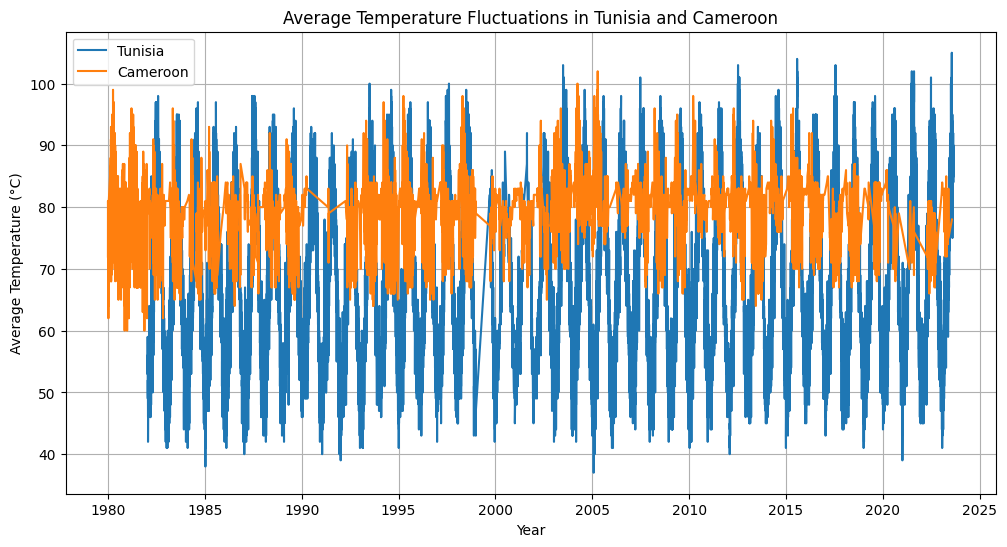

In [ ]:
# Plot a line chart for average temperature fluctuations in Tunisia and Cameroon:
# Filter the data for Tunisia and Cameroon
df_tunisia_cameroon = df[df['COUNTRY'].isin(['Tunisia', 'Cameroon'])]

# Plotting the line chart
plt.figure(figsize=(12, 6))
for country in ['Tunisia', 'Cameroon']:
    country_data = df_tunisia_cameroon[df_tunisia_cameroon['COUNTRY'] == country]
    plt.plot(country_data['DATE'], country_data['TAVG'], label=country)

plt.title('Average Temperature Fluctuations in Tunisia and Cameroon')
plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')
plt.legend()
plt.grid(True)
plt.show()

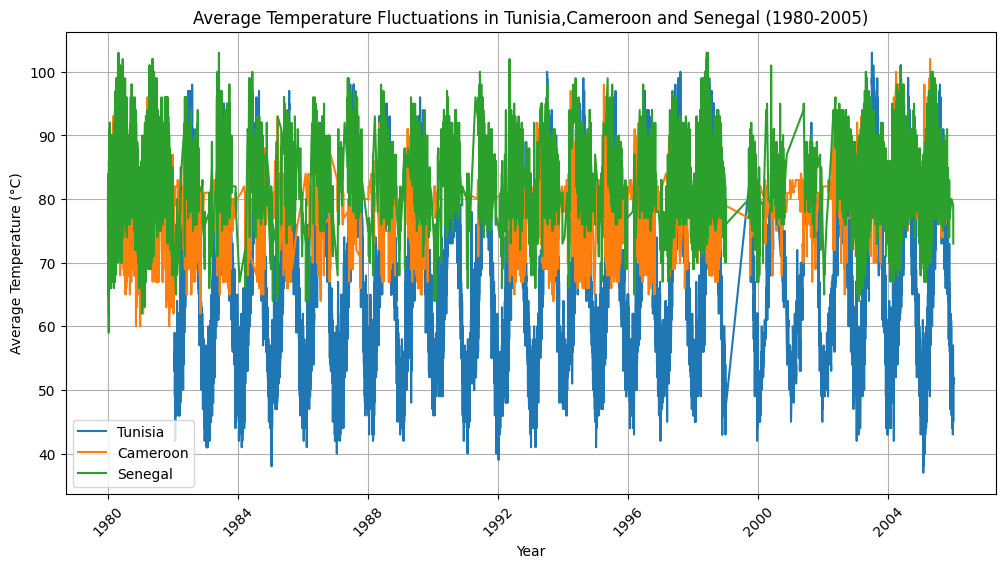

In [ ]:
# Zoom in on the data between 1980 and 2005 and customize axes labels:
# Filter the data for the period 1980-2005
df_zoomed = df[(df['DATE'].dt.year >= 1980) & (df['DATE'].dt.year <= 2005)]

# Plotting the line chart for the zoomed period
plt.figure(figsize=(12, 6)) 
for country in ['Tunisia', 'Cameroon']:
    country_data = df_zoomed[df_zoomed['COUNTRY'] == country]
    plt.plot(country_data['DATE'], country_data['TAVG'], label=country)
   
plt.title('Average Temperature Fluctuations in Tunisia and Cameroon (1980-2005)')
plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


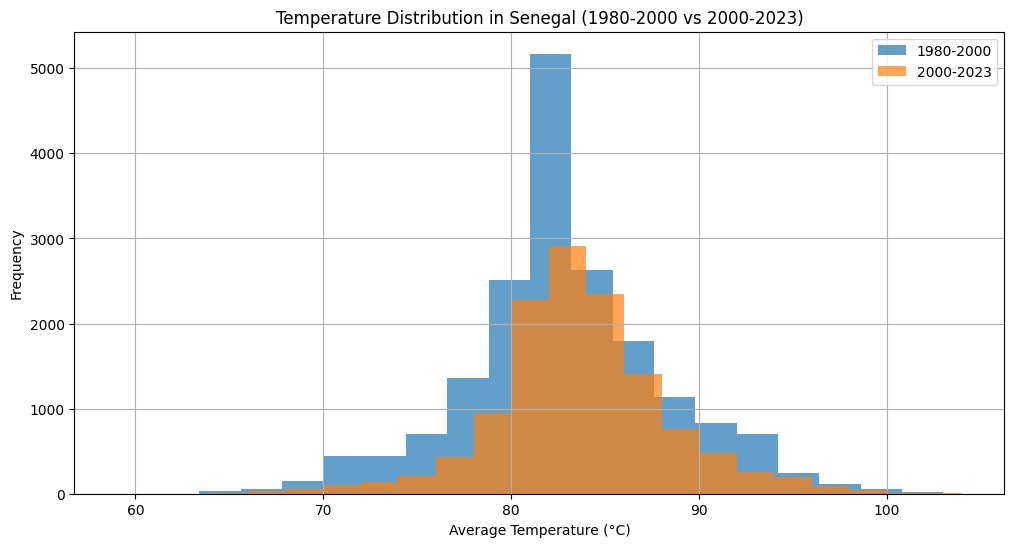

In [26]:
# Create histograms for temperature distribution in Senegal for [1980, 2000] and [2000, 2023]:

# Filter data for Senegal
df_senegal = df[df['COUNTRY'] == 'Senegal']

# Split the data into two periods: 1980-2000 and 2000-2023
df_senegal_1980_2000 = df_senegal[(df_senegal['DATE'].dt.year >= 1980) & (df_senegal['DATE'].dt.year <= 2000)]
df_senegal_2000_2023 = df_senegal[(df_senegal['DATE'].dt.year > 2000) & (df_senegal['DATE'].dt.year <= 2023)]

# Plotting the histograms
plt.figure(figsize=(12, 6))
plt.hist(df_senegal_1980_2000['TAVG'], bins=20, alpha=0.7, label='1980-2000')
plt.hist(df_senegal_2000_2023['TAVG'], bins=20, alpha=0.7, label='2000-2023')

plt.title('Temperature Distribution in Senegal (1980-2000 vs 2000-2023)')
plt.xlabel('Average Temperature (°C)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

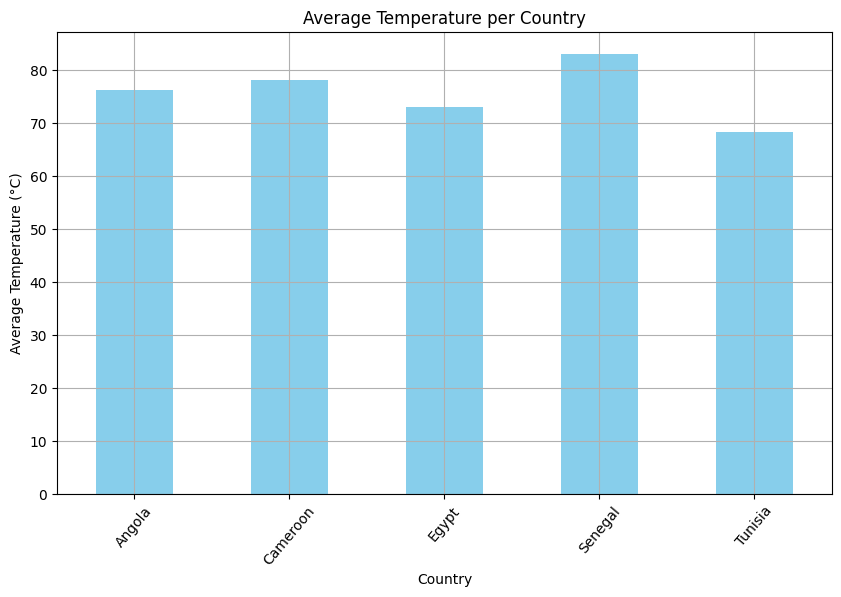

In [ ]:
# Select the best chart to show the average temperature per country:
# Calculate the average temperature per country
avg_temp_per_country = df.groupby('COUNTRY')['TAVG'].mean()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
avg_temp_per_country.plot(kind='bar', color='skyblue')
plt.title('Average Temperature per Country')
plt.xlabel('Country')
plt.ylabel('Average Temperature (°C)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
